<a href="https://colab.research.google.com/github/qwasd34/DEV_DATA/blob/main/%5BML%5D_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree in 분류 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

seed = 1234
np.random.seed(seed)

In [2]:
# 데이터 생성
X, y = make_classification(n_samples=100,
                           n_features=2,
                           n_informative=2, # 2개가 중요한 변수이다 생성할 데이터셋에서 유의미한 특성의 수
                           n_redundant=0,
                           n_clusters_per_class=1,
                           n_classes=3, # 생성할 데이터셋의 타겟 클래스의 수
                           random_state=1)

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X, X_test, y, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

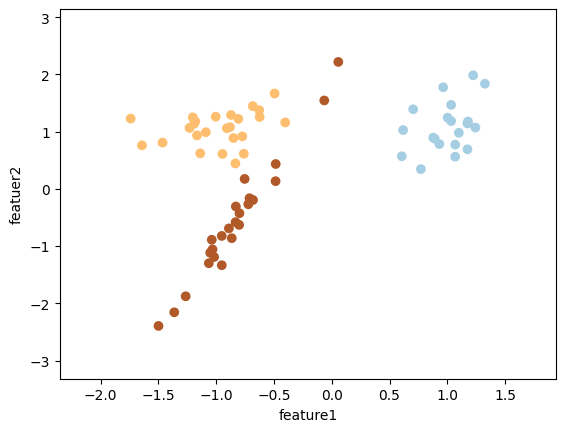

In [4]:
# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.xlabel('feature1')
plt.ylabel('featuer2')

plt.margins(0.2)

plt.show()

## 정보 이득과 지니 불순도 방법을 활용한 Decision Tree 모델 생성

In [6]:
# 정보 이득을 사용하는 결정 트리 분류기 생성
dt_entropy = DecisionTreeClassifier(criterion='entropy',
                                    max_depth=3, # 만들게될 트리의 깊이
                                    min_samples_split=3) # 분기 진행 시작 조건인 노드 내 샘플 수
dt_entropy.fit(X, y)

# 지니 불순도를 사용하는 결정 트리 분류기 생성
dt_gini = DecisionTreeClassifier(criterion='gini',
                                 max_depth=3,
                                 min_samples_split=3) # 분기 진행 시작 조건인 노드 내 샘플 수
dt_gini.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

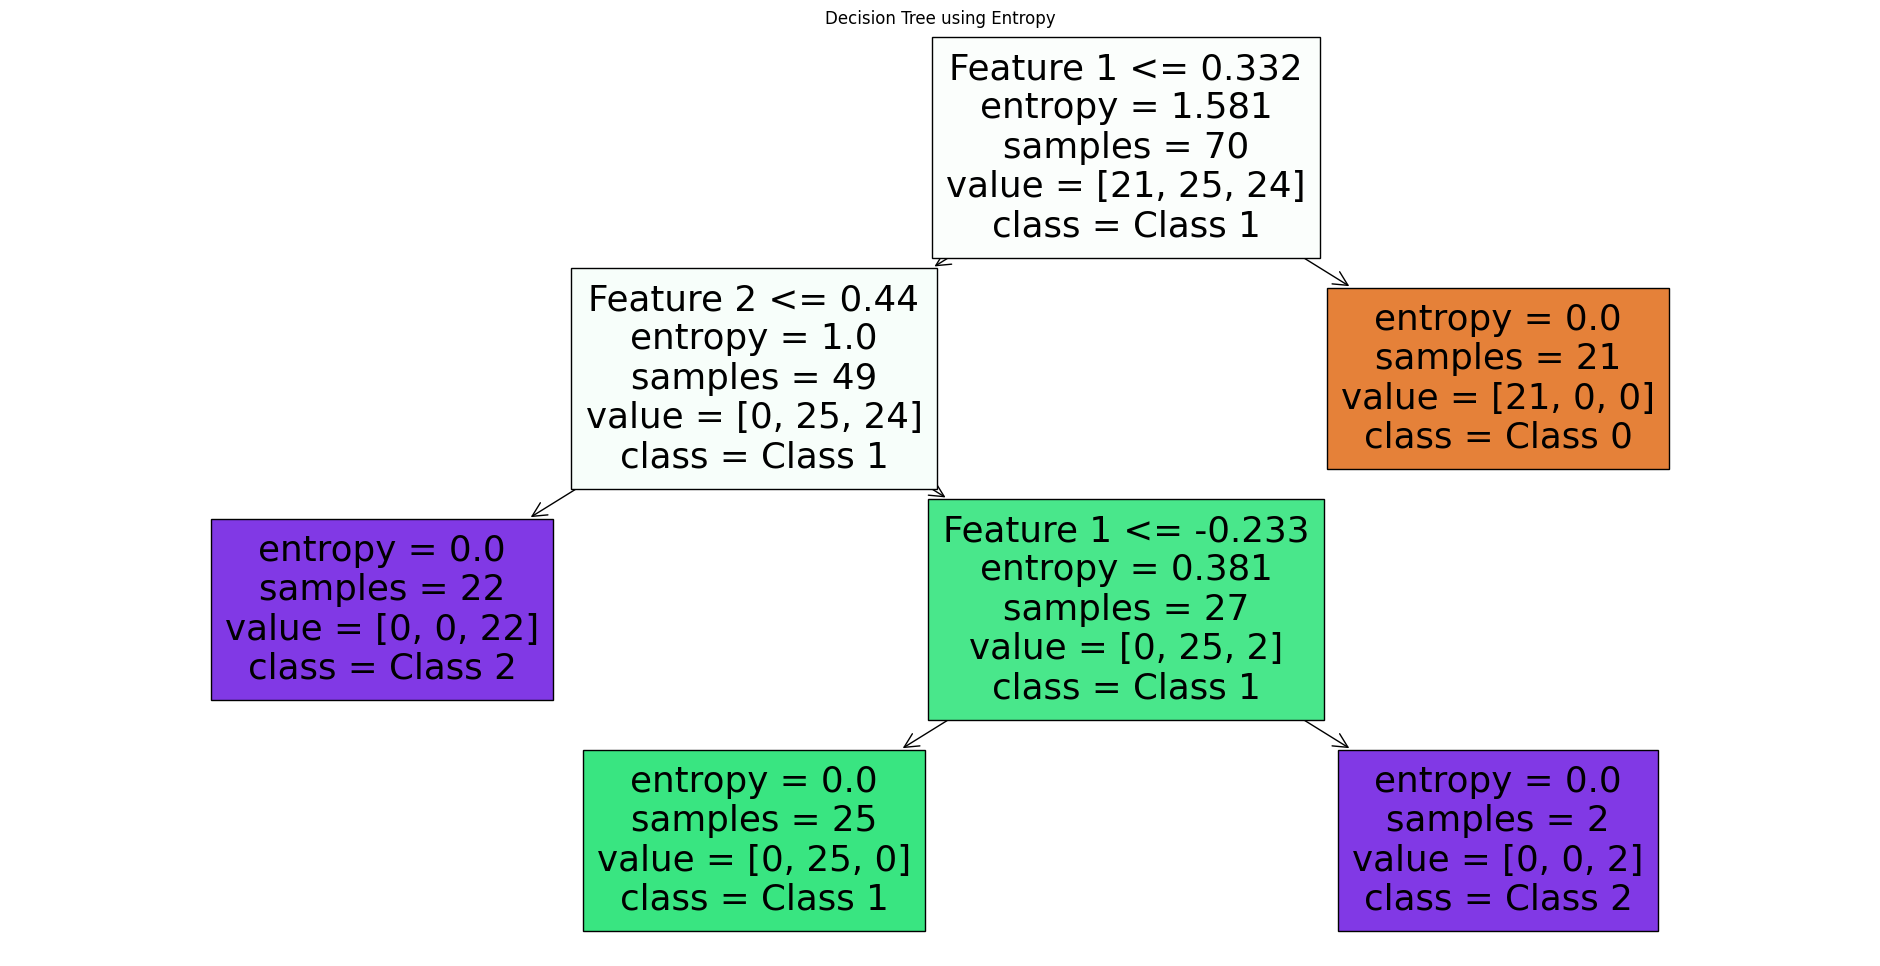

In [7]:
# 두 모델의 훈련된 구조를 확인
from sklearn.tree import plot_tree

# 정보 이득을 사용한 결정 트리
plt.figure(figsize=(24, 12))
plot_tree(dt_entropy, filled=True,
          feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1', 'Class 2'])
plt.title("Decision Tree using Entropy")
plt.show()

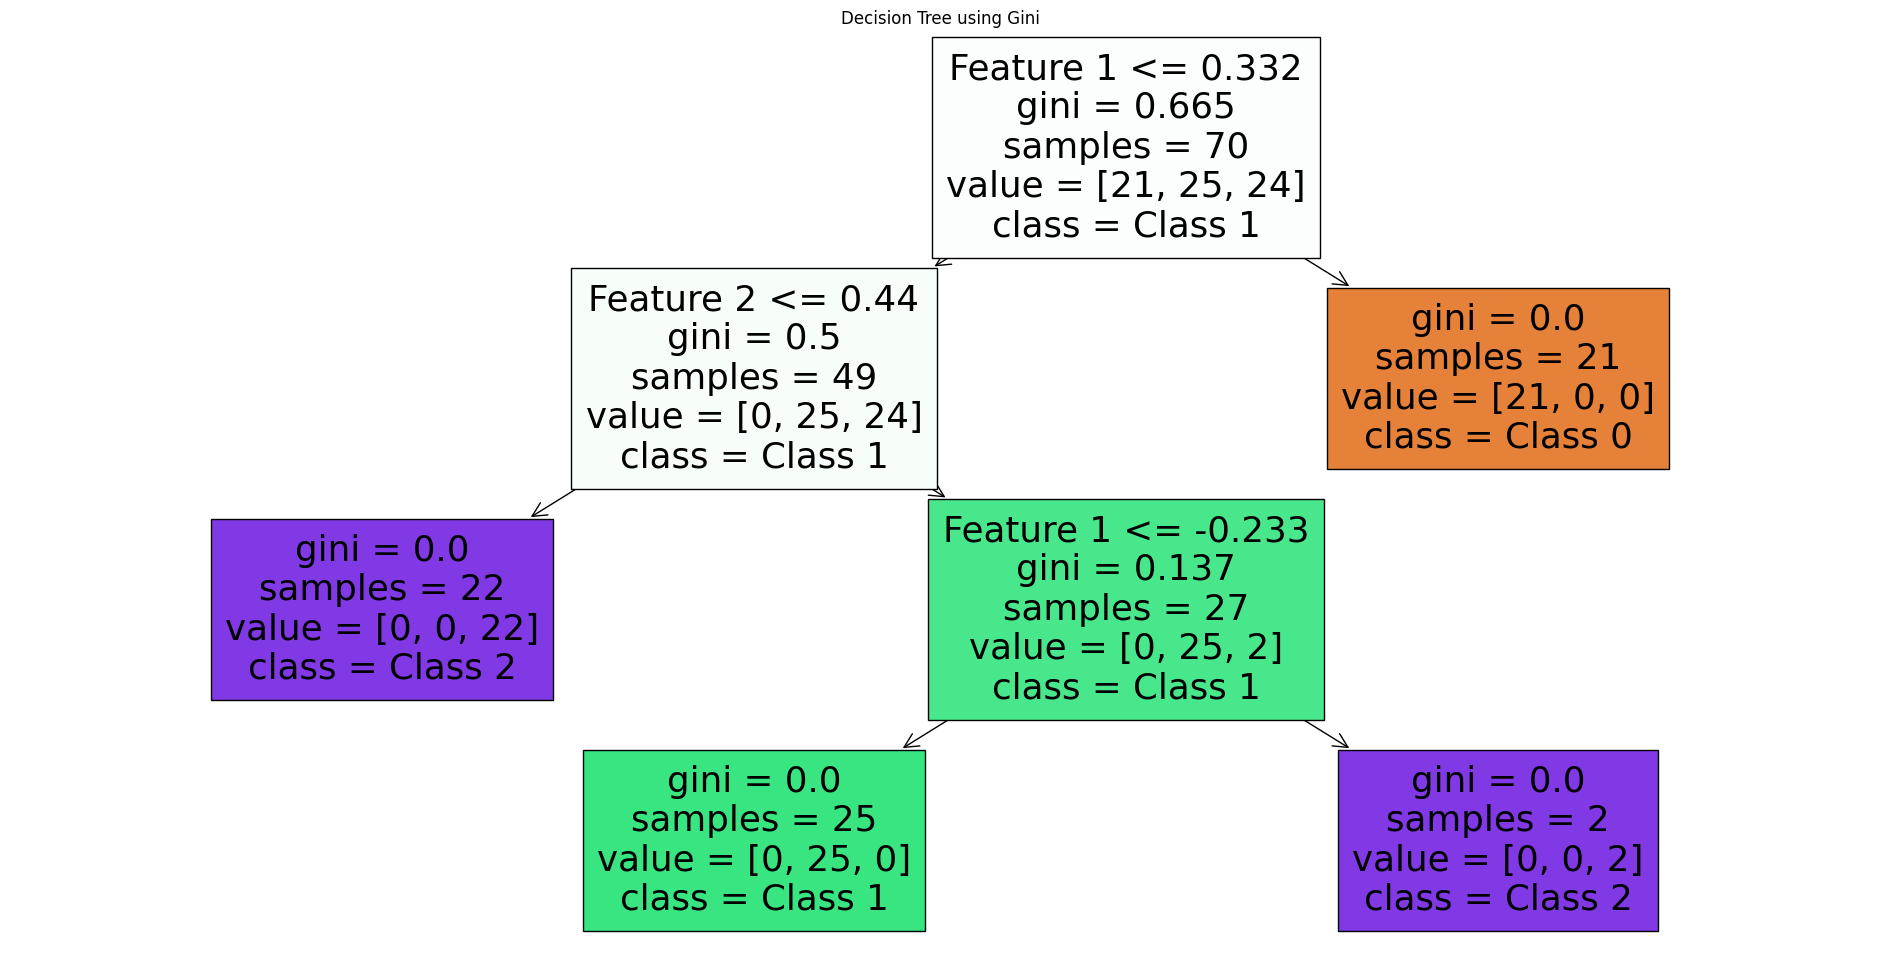

In [8]:
# 지니 불순도를 사용한 결정 트리
plt.figure(figsize=(24, 12))
plot_tree(dt_gini, filled=True,
          feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1', 'Class 2'])
plt.title("Decision Tree using Gini")
plt.show()

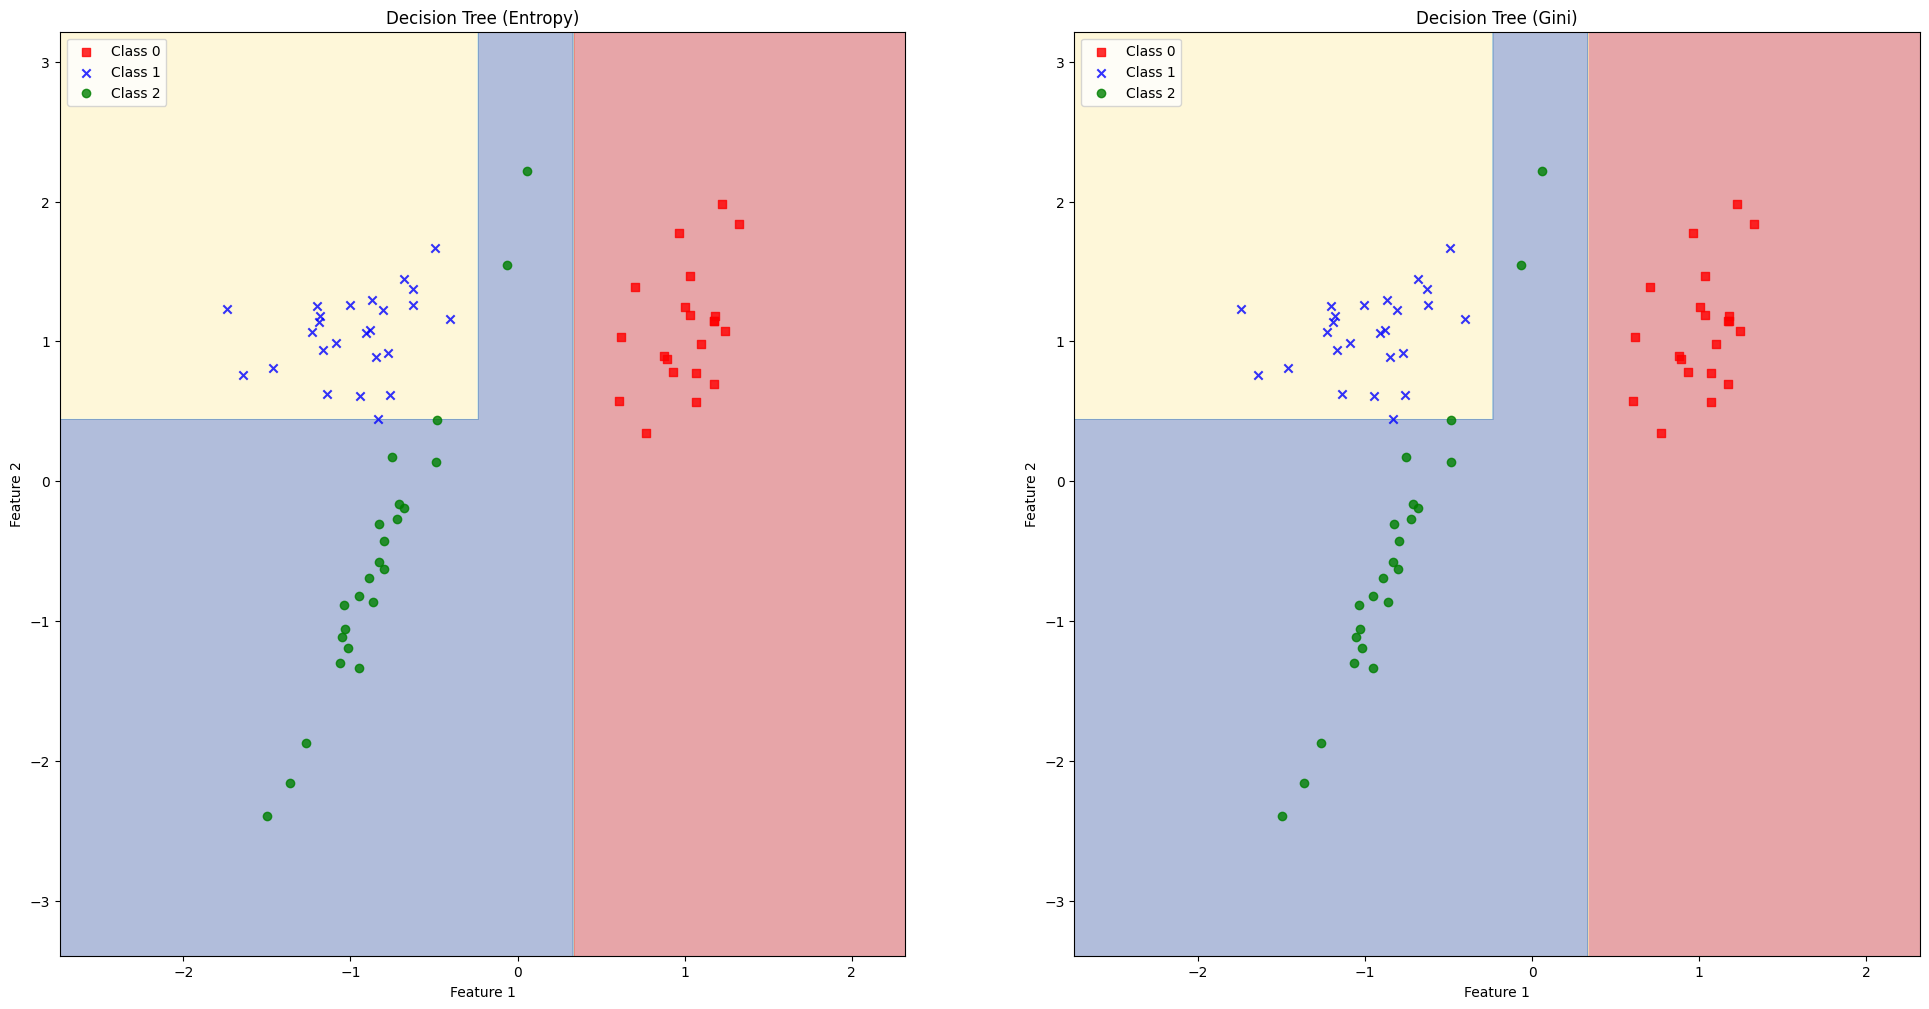

In [9]:
# 결정 경계 그려보기
import numpy as np

# 데이터와 결정 경계를 시각화하는 함수
def plot_decision_boundaries(X, y, model, title):
    # 마커와 색상 설정
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = plt.cm.RdYlBu

    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                           np.arange(x2_min, x2_max, 0.01))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    # 데이터셋의 샘플 플로팅
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='upper left')
    plt.title(title)

# 첫 번째 특성과 두 번째 특성을 이용한 데이터셋 시각화
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_decision_boundaries(X, y, dt_entropy, "Decision Tree (Entropy)")
plt.subplot(1, 2, 2)
plot_decision_boundaries(X, y, dt_gini, "Decision Tree (Gini)")
plt.show()

Accuracy on Entropy : 96.67 %
Accuracy on Gini : 96.67 %


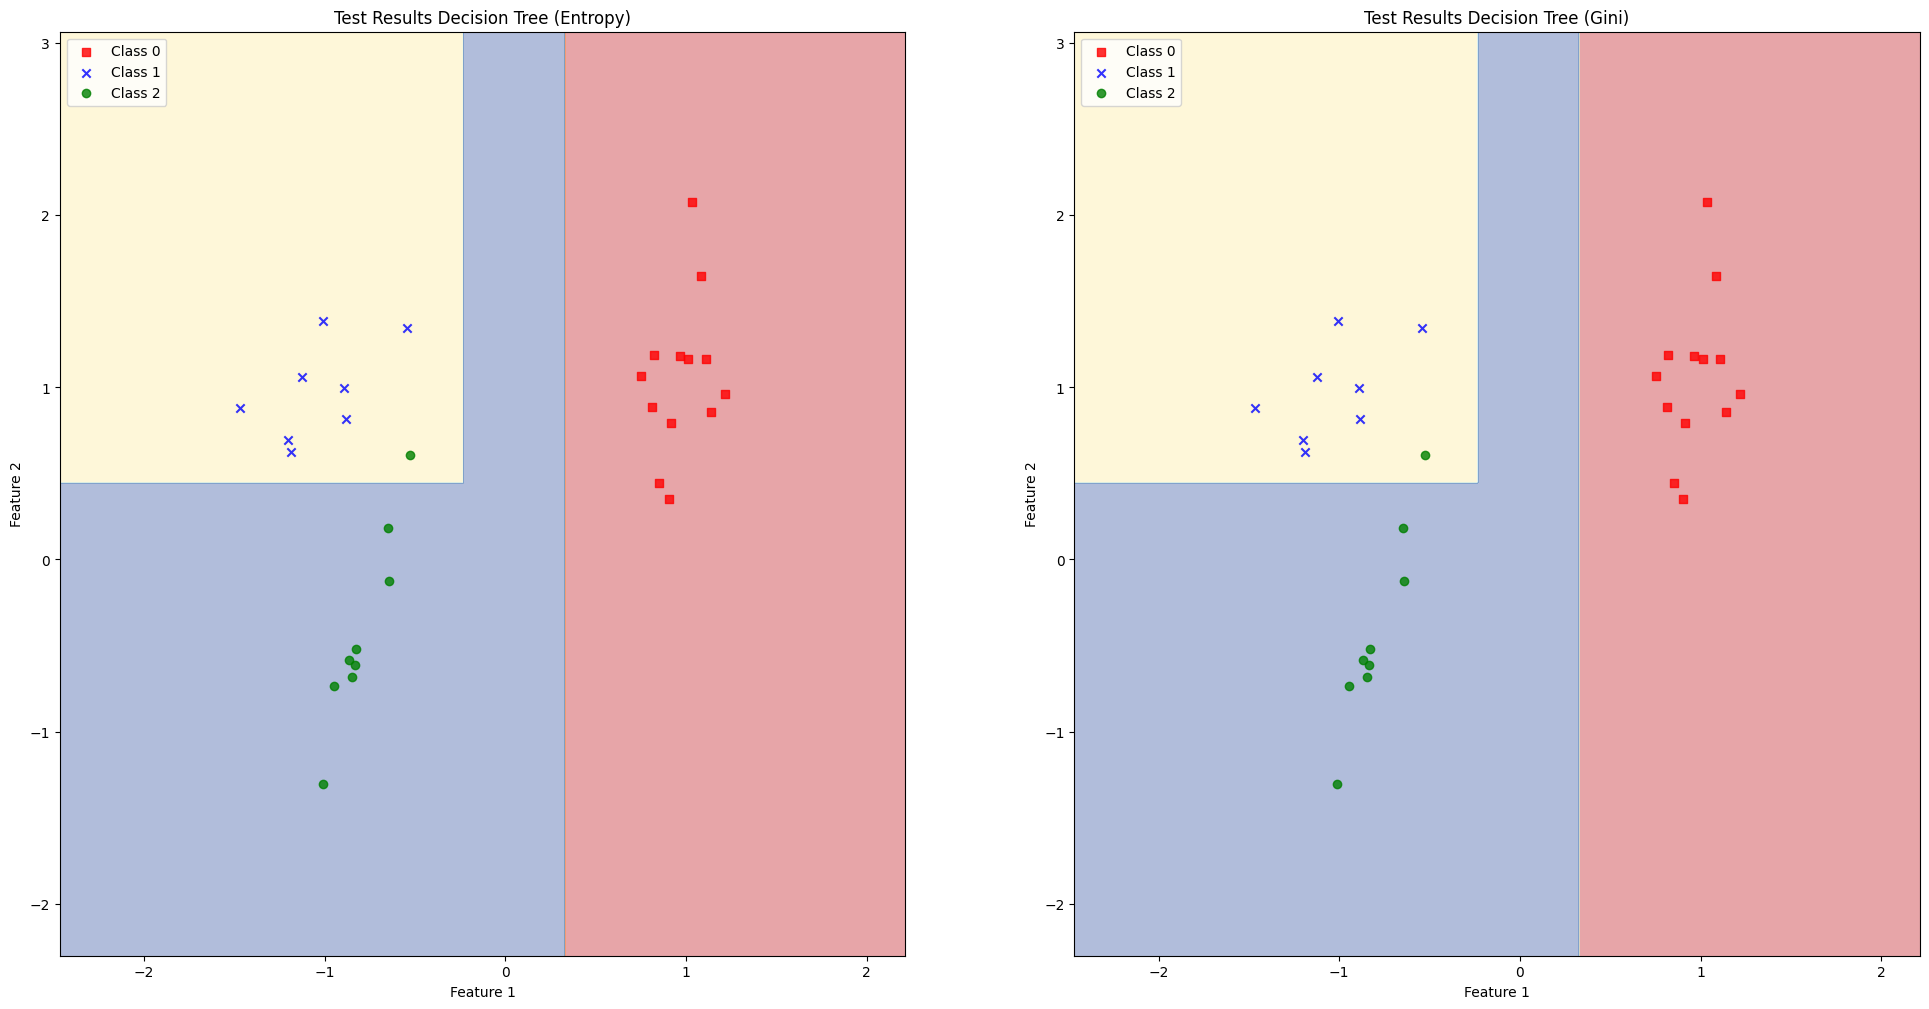

In [10]:
# 평가
y_pred = dt_entropy.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'Accuracy on Entropy : {acc*100:.2f} %')
y_pred = dt_gini.predict(X_test)
acc = (y_pred == y_test).sum() / len(y_test)
print(f'Accuracy on Gini : {acc*100:.2f} %')

plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plot_decision_boundaries(X_test, y_test, dt_entropy, "Test Results Decision Tree (Entropy)")
plt.subplot(1, 2, 2)
plot_decision_boundaries(X_test, y_test, dt_gini, "Test Results Decision Tree (Gini)")
plt.show()

# Decision Tree in 회귀 문제

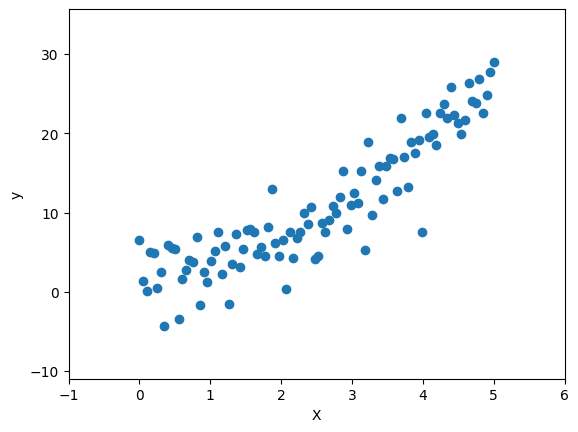

In [11]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# 데이터 생성 변수
w0 = 2.3
w1 = 1
num_data = 100
noise = np.random.normal(0, 3, num_data)

# 데이터 생성
X = np.linspace(0, 5, num_data)
y = w0 + w1 * (X ** 2) + noise

# 시각화
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.margins(0.2)
plt.show()

## MSE 최소화 과정을 활용한 Decision Tree 모델 생성

In [12]:
X = X.reshape(-1, 1) # 학습을 위한 차원 변환 진행

# MSE 최소화 결정 트리 생성
dt_mse_reg = DecisionTreeRegressor(max_depth=3)
dt_mse_reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

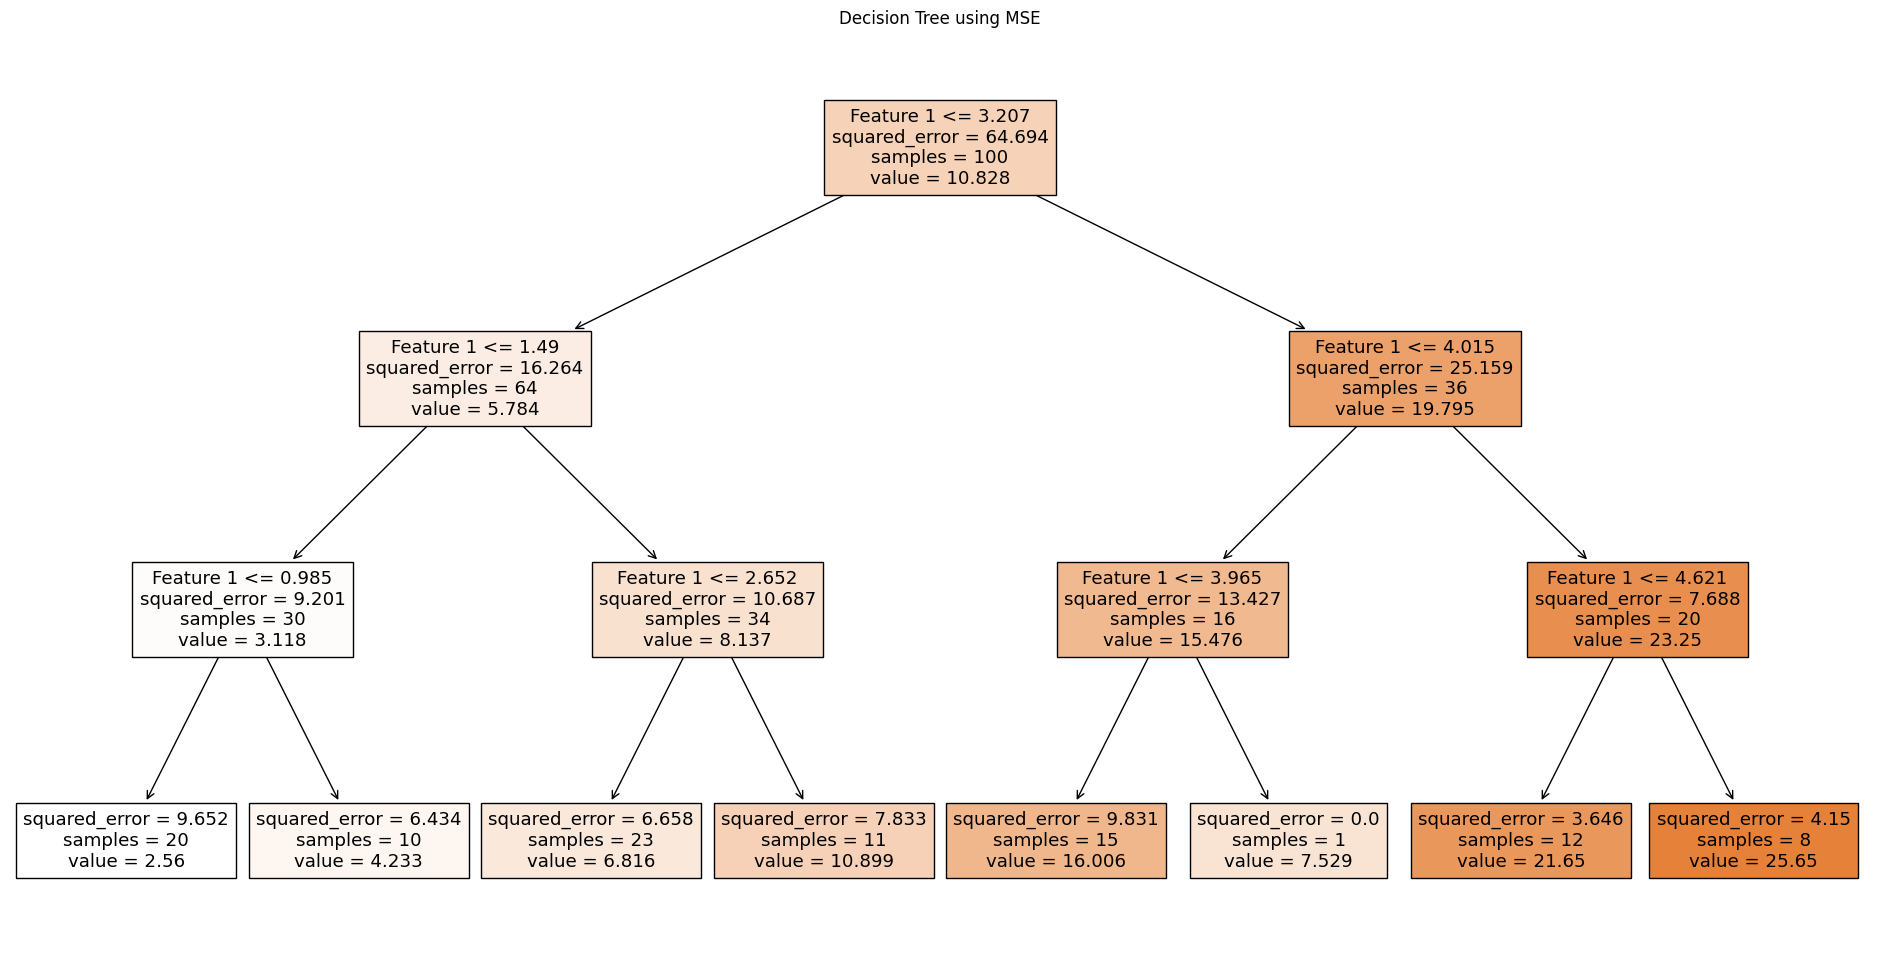

In [13]:
# 트리 시각화
plt.figure(figsize=(24, 12))
plot_tree(dt_mse_reg, filled=True,
          feature_names=['Feature 1', 'Feature 2'])
plt.title("Decision Tree using MSE")
plt.show()

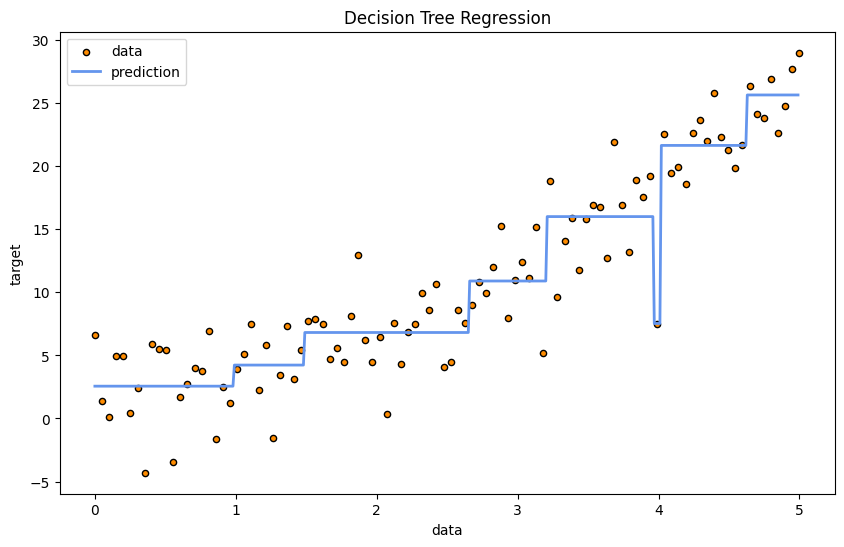

In [14]:
# 결과 예측 진행
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = dt_mse_reg.predict(X_test)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y,
            s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_pred,
         color="cornflowerblue", label="prediction", linewidth=2)

plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

튀어나온 부분 , 두개의 데이터를 나누다 보니까 -> 오버피팅 구간일수있음!